### simulate compound distribution inefficiently

In [74]:
import numpy as np

# Parameters for claim size distribution (gamma distribution)
claim_size_shape = 2
claim_size_scale = 1000

# Parameters for claim number distribution (negative binomial distribution)
claim_number_mean = 10
claim_number_dispersion = 0.5

# Simulate claim size and claim number
claim_numbers = np.random.negative_binomial(
    n=claim_number_mean, p=claim_number_dispersion, size=1000000
)
claim_sizes = np.random.gamma(
    shape=claim_size_shape, scale=claim_size_scale, size=int(np.sum(claim_numbers)) + 1
)

In [75]:
total_claims = []
claim_sizes2 = claim_sizes.copy()
for claim_number in claim_numbers:
    # pop claim number of claim sizes from the claim sizes
    claim_sizes_for_claim = claim_sizes2[:claim_number]
    claim_sizes2 = claim_sizes2[claim_number:]
    total_claims.append(np.sum(claim_sizes_for_claim))

total_claims[0:10]

[20348.295043473718,
 16847.842610002775,
 13141.462347670064,
 35677.93859490012,
 19524.698285314953,
 9390.018587360779,
 31557.48112357151,
 18140.665825012067,
 19079.070382451355,
 24742.290712740858]

In [76]:
summary = np.percentile(total_claims, [0, 25, 50, 75, 100])
summary

array([     0.        ,  12705.26047039,  18728.10671082,  25926.42184468,
       100713.91697065])

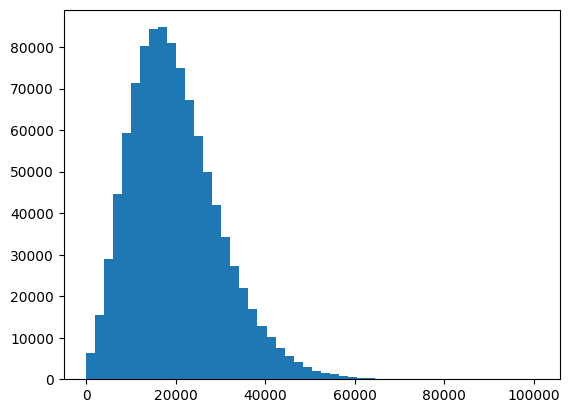

In [77]:
# histogram of total claims
import matplotlib.pyplot as plt

plt.hist(total_claims, bins=50)
plt.show()


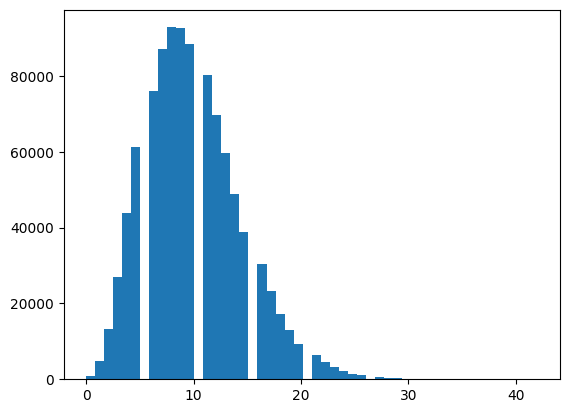

In [78]:
# hist of claim numbers, and claim sizes
plt.hist(claim_numbers, bins=50)
plt.show()

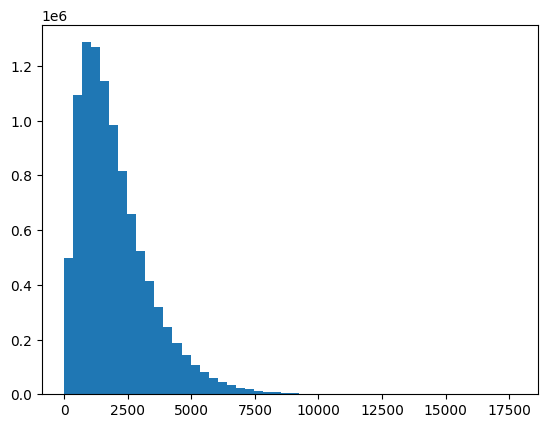

In [79]:
plt.hist(claim_sizes, bins=50)
plt.show()

### simulate more efficiently

In [80]:
from scipy.stats import gamma, nbinom

# parameters
claim_size_shape = 2
claim_size_scale = 1000
claim_number_mean = 10
claim_number_dispersion = 0.5 

# simulate claim sizes
claim_numbers = nbinom.rvs(n=claim_number_mean, p=claim_number_dispersion, size = 1_000_000)
claim_sizes = gamma.rvs(a=claim_size_shape, scale=claim_size_scale, 
                        size= int(1_000_000 * claim_number_mean * 1.2))


In [81]:
import numpy as np

# Calculate the indices to split the claim sizes array
indices = np.cumsum(claim_numbers)[:-1]

# Split the claim sizes array based on the indices
split_claim_sizes = np.split(claim_sizes, indices)
split_claim_sizes = split_claim_sizes[:-1]

total_claims = [np.sum(claim_sizes_for_claim) for claim_sizes_for_claim in split_claim_sizes]
total_claims[0:10]

# Sum the claim sizes for each claim number
# total_claims = np.add.reduceat(claim_sizes, indices)
# total_claims[0:10]


[13686.778300616867,
 19989.33265825289,
 19574.173829520212,
 4078.1151018522914,
 24573.190984252215,
 15122.665562406128,
 12449.335361468533,
 29556.913466129343,
 1884.6015552636052,
 8542.07556797238]

In [82]:
summary = np.percentile(total_claims, [0, 25, 50, 75, 100])
summary

array([     0.        ,  12684.16647472,  18730.3413269 ,  25928.86675752,
       111510.50454734])

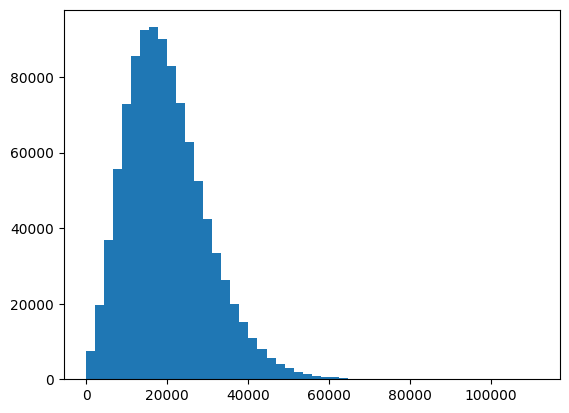

In [83]:
from matplotlib import pyplot as plt
plt.hist(total_claims, bins=50)
plt.show()